# Living in Happiness

An analysis on the 2020 World Happiness Report.  
Credit: https://www.kaggle.com/mathurinache/world-happiness-report?select=2020.csv  
Credit: https://worldhappiness.report/ed/2020/  
Cantril Scale: [How Gallup Uses the Cantril Scale](https://news.gallup.com/poll/122453/understanding-gallup-uses-cantril-scale.aspx)

<img src='images/ladder.png'>

<hr>

### Load the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("resources/WHR2020.csv")

In [4]:
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [5]:
data = data.sort_values('Ladder score', ascending=False)
data.head(10)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
5,Netherlands,Western Europe,7.4489,0.027792,7.503372,7.394428,10.812712,0.939139,72.300919,0.908548,0.207612,0.364717,1.972317,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570,2.352117
6,Sweden,Western Europe,7.3535,0.036234,7.424519,7.282481,10.758794,0.926311,72.600769,0.939144,0.111615,0.250880,1.972317,1.322235,1.433348,0.986470,0.650298,0.272828,0.442066,2.246299
7,New Zealand,North America and ANZ,7.2996,0.039465,7.376953,7.222248,10.500943,0.949119,73.202629,0.936217,0.191598,0.221139,1.972317,1.242318,1.487218,1.008138,0.646790,0.325726,0.461268,2.128108
8,Austria,Western Europe,7.2942,0.033365,7.359596,7.228804,10.742824,0.928046,73.002502,0.899989,0.085429,0.499955,1.972317,1.317286,1.437445,1.000934,0.603369,0.255510,0.281256,2.398446
9,Luxembourg,Western Europe,7.2375,0.030852,7.297970,7.177031,11.450681,0.906912,72.599998,0.905636,-0.004621,0.367084,1.972317,1.536676,1.387528,0.986443,0.610137,0.195954,0.367041,2.153700


In [11]:
whr = data[['Country name', 'Regional indicator', 'Ladder score',
          'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
          'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
whr.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Denmark,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218


### Top ten happiest countries

In [13]:
happy_ten = whr.sort_values('Ladder score', ascending=False)[:10]
happy_ten

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Denmark,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218
5,Netherlands,Western Europe,7.4489,10.812712,0.939139,72.300919,0.908548,0.207612,0.364717
6,Sweden,Western Europe,7.3535,10.758794,0.926311,72.600769,0.939144,0.111615,0.250880
7,New Zealand,North America and ANZ,7.2996,10.500943,0.949119,73.202629,0.936217,0.191598,0.221139
8,Austria,Western Europe,7.2942,10.742824,0.928046,73.002502,0.899989,0.085429,0.499955
9,Luxembourg,Western Europe,7.2375,11.450681,0.906912,72.599998,0.905636,-0.004621,0.367084


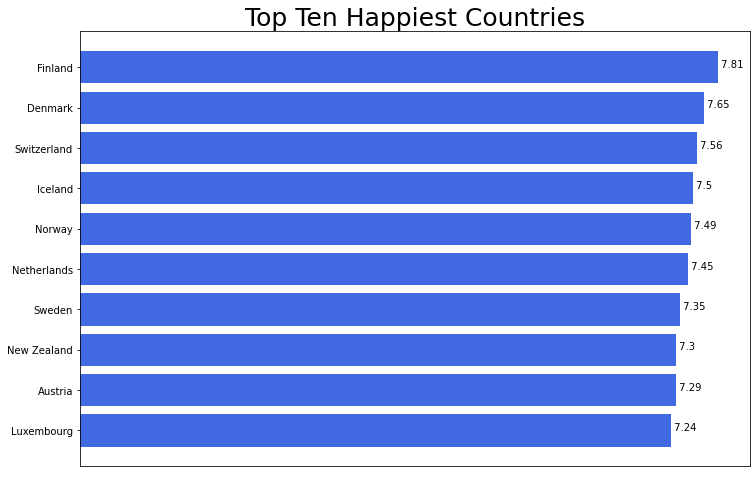

In [79]:
fig, ax = plt.subplots(figsize=(12,8))
plt.barh(happy_ten['Country name'], happy_ten['Ladder score'], color='royalblue', height=0.8)
ax.invert_yaxis()
ax.set_title('Top Ten Happiest Countries', fontsize=25)
plt.xticks([])

for i, j in enumerate(happy_ten['Ladder score']):
    plt.text(j, i, " " + str(round(j, 2)))

In [49]:
happy_25 = whr.sort_values('Ladder score', ascending=False)[:25]
happy_25['Regional indicator'].unique().tolist()

['Western Europe',
 'North America and ANZ',
 'Middle East and North Africa',
 'Latin America and Caribbean',
 'Central and Eastern Europe',
 'East Asia']

In [62]:
# Regions of top 25 happiest countries
region_25 = {}

for i in happy_25['Regional indicator']:
    if i not in region_25:
        region_25[i] = 1
    else:
        region_25[i] += 1
region_25

{'Western Europe': 15,
 'North America and ANZ': 4,
 'Middle East and North Africa': 2,
 'Latin America and Caribbean': 2,
 'Central and Eastern Europe': 1,
 'East Asia': 1}

In [67]:
labels, counts = [], []
for key in region_25:
    labels.append(key)
    counts.append(region_25[key])
print(labels, counts)

['Western Europe', 'North America and ANZ', 'Middle East and North Africa', 'Latin America and Caribbean', 'Central and Eastern Europe', 'East Asia'] [15, 4, 2, 2, 1, 1]


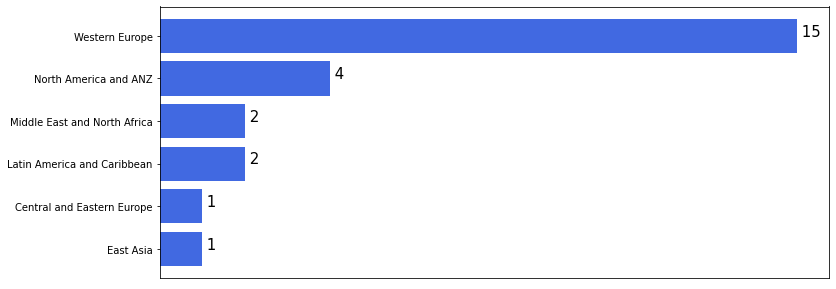

In [81]:
fig2, ax2 = plt.subplots(figsize=(12,5))

plt.barh(labels, counts, color='royalblue', height=0.8)
ax2.invert_yaxis()
plt.xticks([])
for i, j in enumerate(counts):
    plt.text(j, i, " " + str(round(j, 2)), fontsize=15)

In [ ]:
# Regions of top countries
# average of each ladder score category
